<a href="https://colab.research.google.com/github/Giocatory/ml_ai_learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)
(60000,)


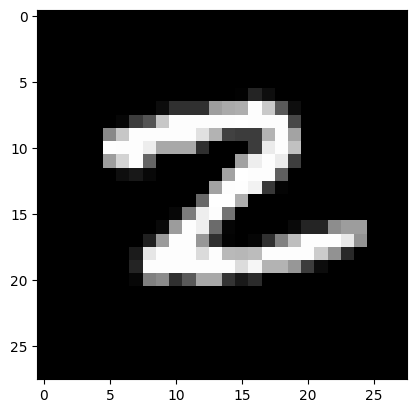

2


In [3]:
print(x_train_org.shape)
print(y_train_org.shape)

plt.imshow(x_train_org[143], cmap="gray")
plt.show()
print(y_train_org[143])

In [4]:
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
y_train = y_train_org.reshape(y_train_org.shape[0], -1)

x_test = x_test_org.reshape(x_test_org.shape[0], -1)
y_test = y_test_org.reshape(y_test_org.shape[0], -1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [5]:
x_train = x_train.astype('float32') / 255
y_train = y_train.astype('float32') / 255

x_test = x_test.astype('float32') / 255
y_test = y_test.astype('float32') / 255

In [6]:
CLASS_COUNT = 10

In [7]:
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

y_train.shape

(60000, 10)

In [8]:
model = Sequential()

model.add(Dense(1000, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(CLASS_COUNT, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 10s 6ms/step - loss: 0.2261 - accuracy: 0.9309 - val_loss: 0.1136 - val_accuracy: 0.9648
Epoch 2/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0921 - accuracy: 0.9719 - val_loss: 0.1124 - val_accuracy: 0.9673
Epoch 3/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0658 - accuracy: 0.9801 - val_loss: 0.1044 - val_accuracy: 0.9711
Epoch 4/12
375/375 [==============================] - 3s 7ms/step - loss: 0.0457 - accuracy: 0.9863 - val_loss: 0.0958 - val_accuracy: 0.9753
Epoch 5/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.1066 - val_accuracy: 0.9747
Epoch 6/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0368 - accuracy: 0.9889 - val_loss: 0.1317 - val_accuracy: 0.9682
Epoch 7/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.0923 - val_accuracy: 0.9767
Epoch

In [10]:
loss, acc = model.evaluate(x_train, y_train)
print(loss)
print(acc)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9945
0.02733181230723858
0.9944999814033508


In [11]:
print(history.history["loss"][-1])
print(history.history["val_loss"][-1])
print(history.history["accuracy"][-1])
print(history.history["val_accuracy"][-1])

0.016810696572065353
0.10759507119655609
0.9952083230018616
0.9809166789054871


4


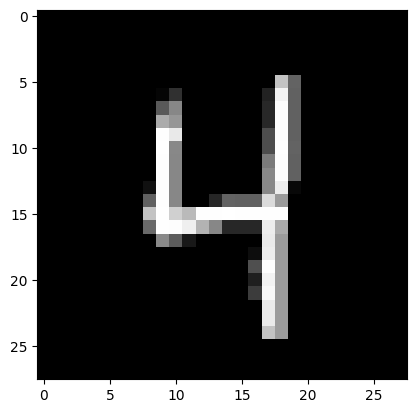

In [12]:
from random import randint


n = randint(1, 100)

plt.imshow(x_train_org[n], cmap="gray")
plt.show
print(y_train_org[n])

In [13]:
model.predict(x_train[:1])

1/1 [==============================] - 0s 89ms/step


array([[1.6164891e-07, 2.1938790e-08, 1.2730304e-07, 7.1755536e-03,
        9.8914676e-10, 9.9282396e-01, 1.4091632e-09, 1.6749210e-08,
        1.1857436e-08, 1.1942899e-07]], dtype=float32)

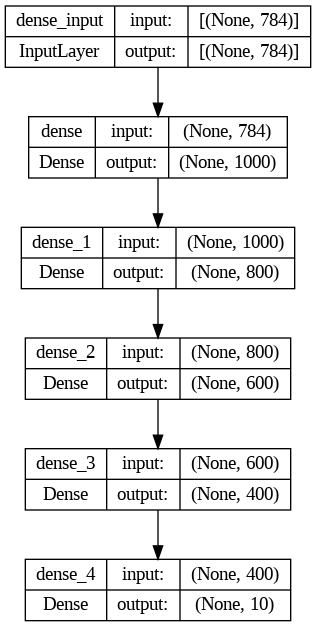

In [14]:
utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)